In [1]:
import pandas as pd

In [2]:
# Wine Quality Classification

data=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv")

In [3]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.isnull().sum()   # No Null Values

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
data.describe()
# We can use .loc[] or .iloc[] to print a subset 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [12]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [13]:
feature_names = data.columns

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

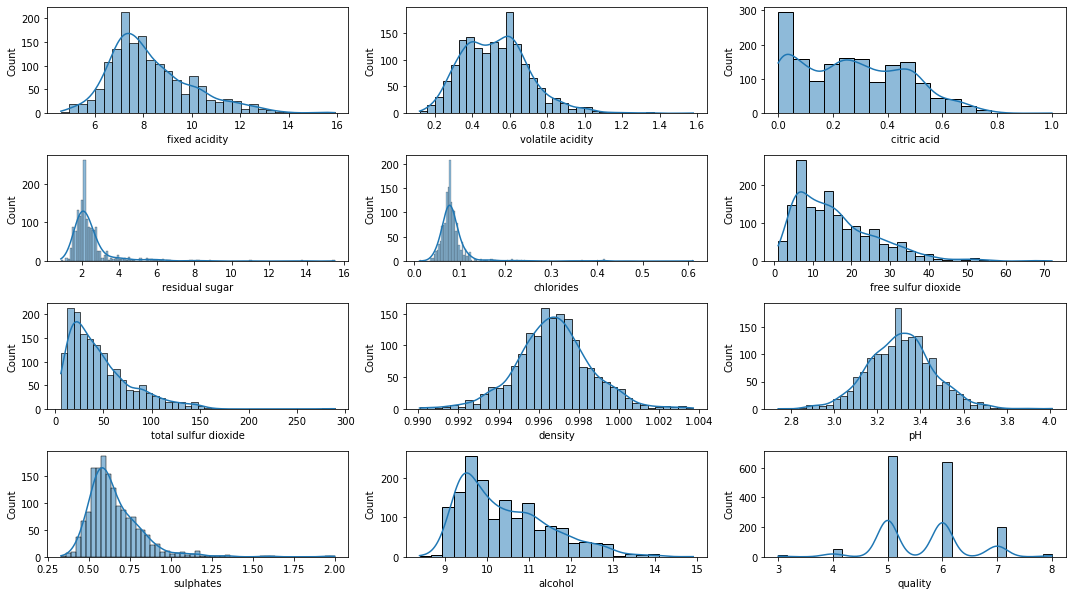

In [20]:
plt.figure(figsize=(15,10))

for i in range(1, len(feature_names)+1):
    plt.subplot(5,3, i)
    sns.histplot(data=data, x=feature_names[i-1], kde=True)
    plt.tight_layout()

## Findings:
- The response variable(Quality of Wine) is highly imabalance. Most of the instances have a quality of 5 or 6. This can affect our model.

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [22]:
X = data.drop(labels=['quality'], axis=1)
y = data['quality']

In [23]:
# Let's create the training & test set
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape, y_train.shape

((1071, 11), (1071,), (528, 11), (528,))

In [37]:
# Preprocessing our training data, bcoz SVM are highly sensitive to the scales of the various features

In [39]:
scalar_std = StandardScaler() 

In [40]:
X_train_scld = scalar_std.fit_transform(X_train)

In [41]:
# Creating the model

In [43]:
svc = SVC(C=1.0, kernel='rbf', degree=3, gamma='scale')

In [45]:
# Training the model on X_train_scld
svc.fit(X_train_scld, y_train)

SVC()

In [46]:
# Preprocessing the test data before making predictions
X_test_scld = scalar_std.transform(X_test)  # didn;t fit to prevent data leakage

In [48]:
# Predictions
predictions = svc.predict(X_test_scld)

In [49]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5984848484848485

In [52]:
# Since, we've to classify the quality of wine. So, we can keep the recall low so that the precision is very high.
# Means we can keep the threshold high. Becoz we don't want to incorrectly classify the wine quality

In [53]:
from sklearn.metrics import confusion_matrix

In [59]:
conf_mat = confusion_matrix(y_test, predictions)

In [60]:
conf_mat

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  13,   6,   0,   0],
       [  0,   0, 170,  46,   1,   0],
       [  0,   0,  76, 127,  10,   0],
       [  0,   0,   0,  51,  19,   0],
       [  0,   0,   0,   3,   4,   0]], dtype=int64)

In [56]:
data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [61]:
# Using Logistic Regression Model
from sklearn.linear_model import LogisticRegression

In [62]:
log_reg = LogisticRegression(solver='liblinear')

In [63]:
log_reg.fit(X_train_scld, y_train)

LogisticRegression(solver='liblinear')

In [64]:
predictions_log = log_reg.predict(X_test_scld)

In [65]:
accuracy_score(y_test, predictions_log)

0.5643939393939394

##### So far, we're doing bulk predicitons. Let's do a single prediction

In [66]:
X_test_scld[36]

array([-1.23268592, -0.80501309,  0.8208699 , -0.38867826, -0.35372197,
       -0.18596079, -0.69023424, -1.35639263,  0.8780443 ,  1.22113424,
        0.73833159])

In [67]:
log_reg.predict([[-1.23268592, -0.80501309,  0.8208699 , -0.38867826, -0.35372197,
       -0.18596079, -0.69023424, -1.35639263,  0.8780443 ,  1.22113424,
        0.73833159]])

array([6], dtype=int64)

In [71]:
y_test.iloc[36]  

7